In [ ]:
import kagglehub
import tqdm as tqdm

# Download latest version
path = kagglehub.dataset_download("ahmedkhanak1995/sign-language-gesture-images-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ahmedkhanak1995/sign-language-gesture-images-dataset/versions/1


In [ ]:
import os
files = os.listdir(path)
print("dataset files: ", files)

dataset files:  ['Gesture Image Pre-Processed Data', 'Gesture Image Data']


In [ ]:

# Replace with your dataset root path
dataset_root = path  # Change this to the actual path

# Dictionary to store organized dataset structure
dataset_dict = {}

# Traverse the root directory
for main_folder in os.listdir(dataset_root):
    main_folder_path = os.path.join(dataset_root, main_folder)

    if os.path.isdir(main_folder_path):  # Check if it's a directory
        dataset_dict[main_folder] = {}  # Initialize sub-dictionary

        # Traverse subfolders (letters, numbers, etc.)
        for subfolder in os.listdir(main_folder_path):
            subfolder_path = os.path.join(main_folder_path, subfolder)

            if os.path.isdir(subfolder_path):  # Ensure it's a directory
                # List all files in this subfolder
                dataset_dict[main_folder][subfolder] = os.listdir(subfolder_path)

# Print the organized dictionary structure
for main_cat, sub_cats in dataset_dict.items():
    print(f"\nCategory: {main_cat}")
    for sub_cat, files in sorted(sub_cats.items()):
        print(f"  Subfolder: {sub_cat} -> {len(files)} files")


Category: Gesture Image Pre-Processed Data
  Subfolder: 0 -> 1500 files
  Subfolder: 1 -> 1500 files
  Subfolder: 2 -> 1500 files
  Subfolder: 3 -> 1500 files
  Subfolder: 4 -> 1500 files
  Subfolder: 5 -> 1500 files
  Subfolder: 6 -> 1500 files
  Subfolder: 7 -> 1500 files
  Subfolder: 8 -> 1500 files
  Subfolder: 9 -> 1500 files
  Subfolder: A -> 1500 files
  Subfolder: B -> 1500 files
  Subfolder: C -> 1500 files
  Subfolder: D -> 1500 files
  Subfolder: E -> 1500 files
  Subfolder: F -> 1500 files
  Subfolder: G -> 1500 files
  Subfolder: H -> 1500 files
  Subfolder: I -> 1500 files
  Subfolder: J -> 1500 files
  Subfolder: K -> 1500 files
  Subfolder: L -> 1500 files
  Subfolder: M -> 1500 files
  Subfolder: N -> 1500 files
  Subfolder: O -> 1500 files
  Subfolder: P -> 1500 files
  Subfolder: Q -> 1500 files
  Subfolder: R -> 1500 files
  Subfolder: S -> 1500 files
  Subfolder: T -> 1500 files
  Subfolder: U -> 1500 files
  Subfolder: V -> 1500 files
  Subfolder: W -> 1500 files

In [ ]:
# Vectorize and Grayscale the data
from PIL import Image, ImageOps
from tqdm import tqdm
import numpy as np

image_vectors = {}


all_files = [
    (main_cat, sub_cat, file)
    for main_cat, sub_cats in dataset_dict.items()
    for sub_cat, files in sorted(sub_cats.items())
    for file in files
]

for main_cat, sub_cat, file in tqdm(all_files, desc="Turn images to grayscale"):
    file_path = os.path.join(dataset_root, main_cat, sub_cat, file)
    try:
        # Open the image
        img = Image.open(file_path)
        gray_img = ImageOps.grayscale(img)
        vector = np.array(gray_img).flatten()
        image_vectors[file_path] = vector

    except Exception as e:
        tqdm.write(f"ERROR: {file_path} -> {e}")

print(f"Converted {len(image_vectors)} images to grayscale vectors.")


Turn images to grayscale: 100%|██████████| 111000/111000 [00:29<00:00, 3753.47it/s]

Converted 111000 images to grayscale vectors.


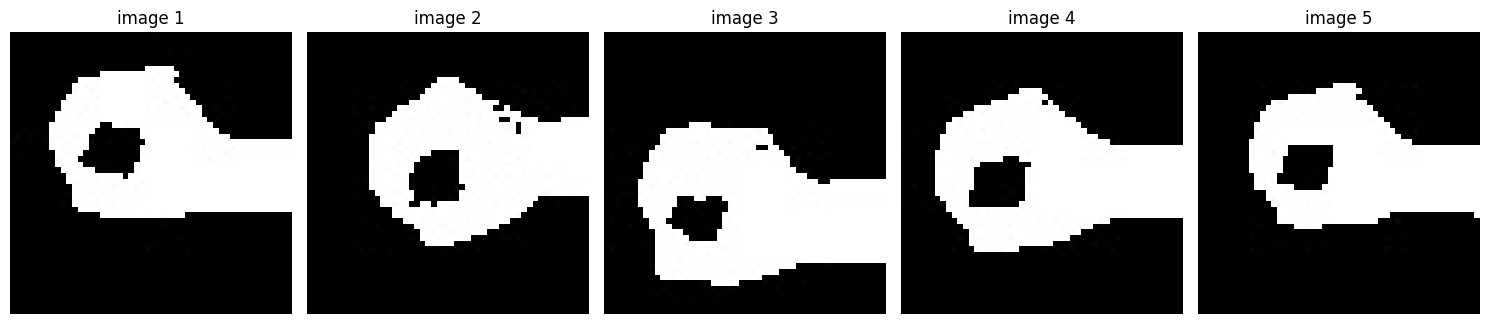

In [ ]:
import matplotlib.pyplot as plt


num_samples = 5  # Adjust the number of images to plot
sample_paths = list(image_vectors.keys())[:num_samples]

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, path in enumerate(sample_paths):
    vector = image_vectors[path]

    # Reshape the flattened vector back to its original dimensions
    side_length = int(np.sqrt(len(vector)))
    reshaped_img = vector.reshape((side_length, side_length))

    axes[i].imshow(reshaped_img, cmap='gray')
    axes[i].set_title(f"image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare Data
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

n_components = 10

X = np.array(list(image_vectors.values()))  # Features: Flattened image vectors
y = np.array([os.path.basename(os.path.dirname(path)) for path in image_vectors.keys()])  # Labels: Subfolder names


# Subsample 10% of the dataset
subsample_size = int(len(X) * 0.1)  # Keep 10% of the data
indices = np.random.choice(len(X), subsample_size, replace=False)  # Randomly select indices
X = X[indices]
y = y[indices]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_test, _, y_test, _ = train_test_split(X_test, y_test, test_size=0.5, random_state=42) #split again to make test faster


# pca = PCA(n_components=n_components)
# X_train_reduced = pca.fit_transform(X_train)
# X_val_reduced = pca.transform(X_val)
# X_test_reduced = pca.transform(X_test)

# print(f"Reduced feature dimensions from {X_train.shape[1]} to {X_train_reduced.shape[1]}.")



Testing KNN Models...

Training KNN with k=1


Evaluating model with k=1: 100%|██████████| 1110/1110 [02:27<00:00,  7.54it/s]


Validation Accuracy for k=1: 99.73%

Training KNN with k=3


Evaluating model with k=3: 100%|██████████| 1110/1110 [02:21<00:00,  7.82it/s]


Validation Accuracy for k=3: 99.10%

Training KNN with k=5


Evaluating model with k=5: 100%|██████████| 1110/1110 [02:20<00:00,  7.90it/s]


Validation Accuracy for k=5: 98.47%

Training KNN with k=7


Evaluating model with k=7: 100%|██████████| 1110/1110 [02:21<00:00,  7.82it/s]


Validation Accuracy for k=7: 97.75%


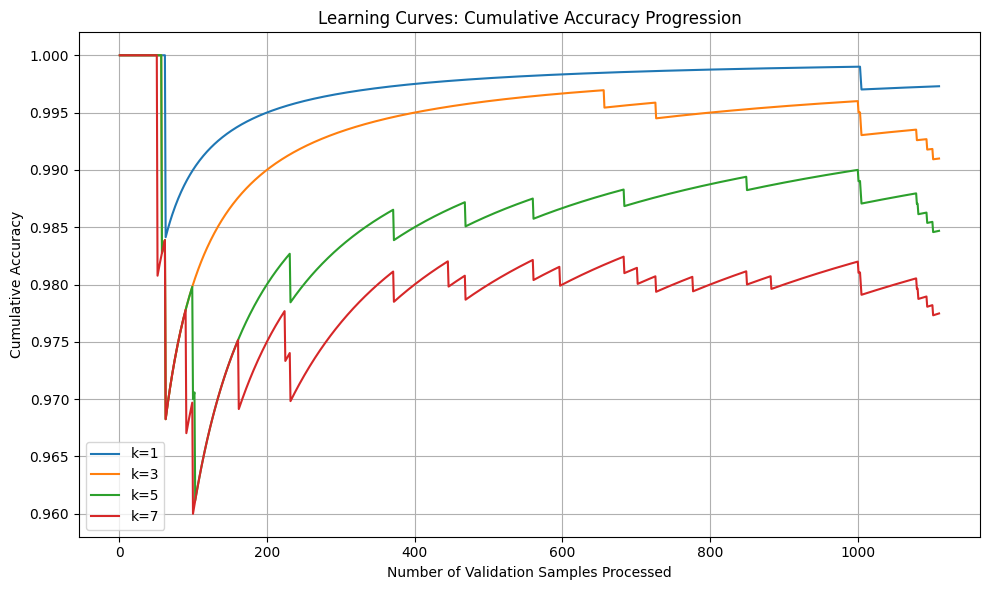

In [ ]:
print("\nTesting KNN Models...")

models = {}
cumulative_progression = {}

for k in [1, 3, 5, 7]:
    print(f"\nTraining KNN with k={k}")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    models[k] = model

    cum_accuracy = []
    correct_count = 0

    # Evaluate the model sample by sample on the validation set
    for i, x in enumerate(tqdm(X_val, desc=f"Evaluating model with k={k}")):
        pred = model.predict([x])[0]
        if pred == y_val[i]:
            correct_count += 1
        cum_accuracy.append(correct_count / (i + 1))

    cumulative_progression[k] = cum_accuracy
    final_acc = cum_accuracy[-1]
    print(f"Validation Accuracy for k={k}: {final_acc:.2%}")

# Plot the cumulative accuracy progression for each k
plt.figure(figsize=(10, 6))
for k, progression in cumulative_progression.items():
    plt.plot(range(1, len(progression) + 1), progression, label=f'k={k}')

plt.xlabel("Number of Validation Samples Processed")
plt.ylabel("Cumulative Accuracy")
plt.title("Learning Curves: Cumulative Accuracy Progression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Best Model is
best_k = 1

Test Accuracy for k=1: 99.82%
Total number of incorrect predictions: 1

Class '8' was misclassified as:
  - 4: 1



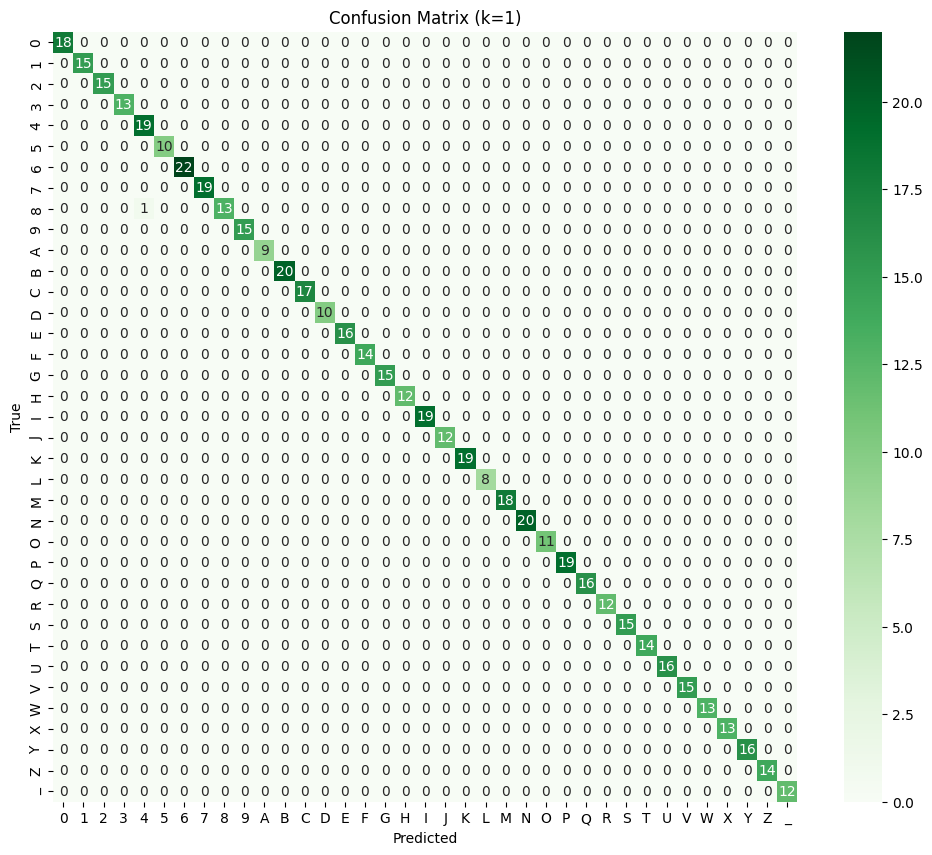

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pick the best model from the models dictionary using best_k
best_model = models[best_k]

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy for k={best_k}: {accuracy:.2%}")

# Get class names from the actual test labels and predictions
class_names = np.unique(np.concatenate((y_test, y_pred)))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate total number of incorrect predictions (off-diagonal values)
total_incorrect = int(cm.sum() - np.trace(cm))
print(f"Total number of incorrect predictions: {total_incorrect}\n")

# Loop through each class (row) to show misclassifications
for i, true_label in enumerate(class_names):
    misclassifications = {}
    for j, predicted_label in enumerate(class_names):
        if i != j and cm[i, j] > 0:
            misclassifications[predicted_label] = int(cm[i, j])
    if misclassifications:
        print(f"Class '{true_label}' was misclassified as:")
        for pred_label, count in misclassifications.items():
            print(f"  - {pred_label}: {count}")
        print()  #


plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix (k={best_k})')
plt.show()


In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming best_model is your selected KNN classifier and X_test, y_test are defined

# Measure inference time for the entire test set
start_time = time.time()
y_pred = best_model.predict(X_test)
end_time = time.time()

# Calculate total and average inference time per sample
total_inference_time = end_time - start_time
average_inference_time = total_inference_time / len(X_test)

# Compute other performance metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy: {accuracy:.2%}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

print(f"Average Inference Time per sample: {average_inference_time*1000:.2f} ms")


Test Accuracy: 99.82%
Precision (macro): 0.9986
Recall (macro): 0.9981
F1 Score (macro): 0.9983
Average Inference Time per sample: 4.53 ms
